<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 2 - Part 2: <strong>Custom CNN</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for cats_and_dogs dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
            <ol>
            <li><a href="#2.1">Obter um conjunto de validação</a></li>
        </ol>
    <li><a href="#3">Rede neuronal convolucional “custom”</a></li>
        <ol>
            <li><a href="#3.1">Construir o modelo</a></li>
            <li><a href="#3.2">Compilar a rede</a></li>
            <li><a href="#3.3">Treinar o modelo – max 50 épocas, de pref. a usar callbacks</a></li>
            <li><a href="#3.4">Gráfico que mostre a evolução do treino</a></li>
            <li><a href="#3.5">Cálculo dos acertos no conjunto de teste</a></li>
            <li><a href="#3.6">Mostrar a matriz de confusão</a></li>
        </ol>
    <li><a href="#4">Model Explanation</a></li>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

Dizer os objetivos

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [1]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import sys
import os
from pathlib import Path

import nbformat
from nbconvert import PythonExporter

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.scores import CategoricalScore

from tensorflow.keras.models import Model 
from tensorflow.python.profiler import profiler_v2 as profiler

import nbimporter
import optuna

2025-03-29 00:18:59.239969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743207539.373203   86956 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743207539.416812   86956 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743207539.669733   86956 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743207539.669783   86956 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743207539.669786   86956 computation_placer.cc:177] computation placer alr

In [2]:
# Configurar a seed do TensorFlow
tf.keras.utils.set_random_seed(42)
# Definir a seed global para a operação de GPU
tf.config.experimental.enable_op_determinism()

# tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
!nvidia-smi # Verifica a GPU
!nvcc --version   # Verifica a versão do CUDA

Sat Mar 29 00:19:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              3W /   65W |    2003MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória dinamicamente
        print("Memória da GPU configurada para crescimento dinâmico.")
    except RuntimeError as e:
        print(e)

Memória da GPU configurada para crescimento dinâmico.


In [5]:
tf.config.optimizer.set_jit(True)  # Ativa JIT (Just-in-Time) Compilation
print("XLA ativado.")

XLA ativado.


# <a class='anchor' id='2.1.'></a>

> # **2.1. Criação de um conjunto de Validação**

In [6]:
%run ../src/cats_and_dogs.py

Found 2000 files belonging to 2 classes.


I0000 00:00:1743207553.169116   86956 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1000 files belonging to 2 classes.
Using 500 files for training.
Using 500 files for validation.


2025-03-29 00:19:21.957832: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-29 00:19:22.309415: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train: 2000 samples, 50.00% dogs
Validation: 500 samples, 49.40% dogs
Test: 500 samples, 50.60% dogs


# <a class='anchor' id='3'></a>

> # **3. Rede neuronal convolucional “custom”**

# <a class='anchor' id='3.1'></a>

> ## **a) Construir o modelo**

In [7]:
# Baseline model
baseline_model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=4),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    # Camada densa final
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])

# Model with more Conv2D layers
conv2d_model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=4),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    # Camada densa final
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])

# Model with dropout and more Conv2D layers
dropout_model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=4),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# Model with dropout, more Conv2D layers and data augmentation

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),  # Espelhamento horizontal
    layers.RandomRotation(0.1),  # Rotação até ±10%
    layers.RandomZoom(0.1),  # Zoom in/out até ±10%
    layers.RandomContrast(0.1),  # Ajuste de contraste
    layers.RandomBrightness(0.1),  # Ajuste de brilho
])

augmented_model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=4),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# Model with BatchNormalization
final_model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(16, 5, padding='same', activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),    
    layers.Conv2D(32, 3, padding='same', activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=4),
    layers.Conv2D(64, 3, padding='same', activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, 3, padding='same', activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
ModelosEscolhidos = [baseline_model, conv2d_model, dropout_model, augmented_model, final_model]
model = ModelosEscolhidos[4]

ModelosEscolhidos = {
    baseline_model: 'baseline_model',
    conv2d_model: 'conv2d_model',
    dropout_model: 'dropout_model',
    augmented_model: 'augmented_model',
    final_model: 'final_model'
}

# <a class='anchor' id='3.2'></a>

> ## **b) Compilar a rede**

In [9]:
# Callback para guardar os pesos do melhor modelo
best_model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=f"tmp/{ModelosEscolhidos[model]}.weights.h5",  # Caminho onde os pesos do melhor modelo serão guardados
    save_weights_only=True,  # Apenas os pesos do modelo são guardados (não a arquitetura completa)
    monitor='val_loss',  # Monitoriza a perda (loss) no conjunto de validação
    mode='min',  # O melhor modelo será aquele que tiver a menor val_loss
    save_best_only=True  # Apenas guarda o modelo se for o melhor encontrado até ao momento
)

# Callback para interromper o treino cedo caso a perda não melhore
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitoriza a perda no conjunto de validação
    patience=5  # Se a val_loss não melhorar durante 5 epochs consecutivas, o treino é interrompido
)

# Callback para reduzir a taxa de aprendizagem quando a perda estabiliza
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitoriza a perda no conjunto de validação
    factor=0.5,  # Reduz a taxa de aprendizagem para 50% do valor atual
    patience=7,  # Aguarda 7 epochs sem melhoria antes de reduzir a taxa de aprendizagem
    min_lr=1e-6  # Define um limite mínimo para a taxa de aprendizagem (não reduz mais do que isto)
)

In [10]:
tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adam',
)

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# <a class='anchor' id='3.3'></a>

> ## **c) Treinar o modelo – max 50 épocas, de pref. a usar callbacks**


In [11]:
# Queres usar o optuna?

resposta = 's'

if resposta == 'n':
    # Definir o caminho para guardar os pesos do modelo
    file_path = Path(f"tmp/{ModelosEscolhidos[model]}.weights.h5")

    # Criar a pasta "tmp" caso não exista
    file_path.parent.mkdir(parents=True, exist_ok=True)

    if not file_path.exists():
        print("🔄 A treinar o modelo...")
        history = model.fit(
            train, 
            epochs=50, 
            validation_data=validation,
            callbacks=[best_model_checkpoint, early_stopping, reduce_lr]
        )
        print("✅ Treino concluído.")
    else:
        print(f"ℹ️ O ficheiro de pesos já existe: {file_path}")
        print(f"Se queres voltar a treinar o modelo, apaga o ficheiro {file_path} manualmente.")
    
elif resposta == 's':
    print("⚠️ Atenção: Estás prestes a executar um script potencialmente exigente.")
    confirmacao = input("Tens a certeza que queres correr o script Optuna? (s/n) ").strip().lower()
    
    if confirmacao == 's':
        from subprocess import run
        run(["python", "../src/optuna_tuning.py"])
    else:
        print("❌ Execução do Optuna cancelada.")

else:
    print("❌ Resposta inválida. Treino não realizado.")

⚠️ Atenção: Estás prestes a executar um script potencialmente exigente.
❌ Execução do Optuna cancelada.


# <a class='anchor' id='3.4'></a>

> ## **d) Gráfico que mostre a evolução do treino**

In [12]:
if 'history' in locals() and hasattr(history, 'history') and history.history:
    # Configurar o estilo do seaborn
    sns.set(style="whitegrid", palette="muted")

    # Criar a figura
    plt.figure(figsize=(14, 6))

    # Subplot para Loss
    plt.subplot(1, 2, 1)
    epochs = range(1, len(history.history['loss']))  # Garante que começa em 1
    plt.plot(epochs, history.history['loss'][1:], label='Train Loss', color=sns.color_palette("Blues")[2], linestyle='-', marker='o', markersize=6)
    plt.plot(epochs, history.history['val_loss'][1:], label='Validation Loss', color=sns.color_palette("Reds")[2], linestyle='--', marker='s', markersize=6)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Evolução do Loss', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Definir os ticks do eixo X para começar em 1
    plt.xticks(epochs)


    # Subplot para Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color=sns.color_palette("Blues")[2], linestyle='-', marker='o', markersize=6)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=sns.color_palette("Reds")[2], linestyle='--', marker='s', markersize=6)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Evolução da Accuracy', fontsize=14, fontweight='bold')
    plt.ylim(0, 1)  # Garantir que o eixo Y da Accuracy vai de 0 a 1
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Adicionar um título geral à figura
    plt.suptitle(f'Evolução do Treino do {ModelosEscolhidos[model]}', fontsize=16, fontweight='bold')

    # Ajustar espaçamento
    plt.tight_layout()
    plt.show()

else:
    print("ℹ️ Não há histórico de treino disponível para visualizar.")

ℹ️ Não há histórico de treino disponível para visualizar.


In [14]:
ModelosEscolhidos[model]

'final_model'

In [13]:
# Carregar melhor modelo em validação
model.load_weights(f"tmp/{ModelosEscolhidos[model]}.weights.h5")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 11 objects could not be loaded. Example error message for object <Conv2D name=conv2d_15, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(5, 5, 3, 16), Received: value.shape=(3, 3, 3, 4). Target variable: <Variable path=sequential_5/conv2d_15/kernel, shape=(5, 5, 3, 16), dtype=float32, value=[[[[-3.69989872e-03  5.17319888e-02  2.69939005e-02 ... -7.16545805e-02
     1.01192012e-01  1.28209740e-02]
   [ 4.09438461e-02  7.30028152e-02 -2.56302059e-02 ...  1.13595724e-02
    -6.10908456e-02  3.11417282e-02]
   [-2.40382552e-02  6.30522072e-02  3.75863016e-02 ...  1.20930374e-03
     8.54768902e-02 -1.64533705e-02]]

  [[-2.25240216e-02 -2.31420398e-02 -4.97229099e-02 ...  5.68512231e-02
    -4.78189811e-02 -3.13198939e-02]
   [-5.00412993e-02 -5.93196601e-02 -6.32422641e-02 ... -4.42271158e-02
    -1.74773782e-02 -5.58967739e-02]
   [ 9.17298496e-02  8.19314569e-02 -2.43915617e-02 ...  4.21985388e-02
    -3.74652743e-02  7.10223019e-02]]

  [[-1.44662932e-02  1.07939735e-01 -7.02259019e-02 ...  3.72340828e-02
     2.92551368e-02  6.52379692e-02]
   [ 8.61861557e-02 -5.31854555e-02 -1.00010335e-01 ...  2.44000554e-02
     3.65746766e-02 -8.73532444e-02]
   [-1.10395014e-01  7.56939650e-02  1.01383090e-01 ... -7.95456022e-02
    -5.71832061e-05  1.17808580e-03]]

  [[-8.26760158e-02  2.64046639e-02 -2.46523917e-02 ...  7.71253407e-02
    -7.67545998e-02 -4.32354957e-03]
   [-4.46795672e-02  2.64378041e-02 -6.93530515e-02 ... -2.57693827e-02
     9.18909460e-02 -5.30163459e-02]
   [-3.77023071e-02 -7.90080801e-02 -5.29752932e-02 ...  3.06195021e-02
    -2.05760598e-02 -5.73849939e-02]]

  [[-1.10054441e-01  4.62927669e-02  7.51453638e-02 ...  4.53574210e-02
     7.98448175e-02  5.88080436e-02]
   [ 1.09949216e-01  1.04547158e-01 -4.85118702e-02 ...  2.50399858e-03
    -4.47100848e-02 -1.44429803e-02]
   [-2.47179344e-02 -6.22795112e-02  5.91726601e-02 ...  3.11458856e-02
     2.18248069e-02  1.10861510e-01]]]


 [[[-8.08903128e-02 -3.23733762e-02 -1.10549763e-01 ... -4.92177010e-02
    -5.73532954e-02 -1.09463781e-02]
   [ 3.93203497e-02 -1.11150369e-02  2.36500055e-02 ... -6.24263808e-02
     2.08634436e-02 -6.73353672e-02]
   [ 7.23542720e-02 -7.49459490e-02  8.20329934e-02 ... -9.17345285e-03
    -6.56883046e-02  5.92508912e-03]]

  [[ 6.11635745e-02  1.41876489e-02  3.67739648e-02 ... -1.45459324e-02
     8.52474868e-02 -2.60266215e-02]
   [-9.40438360e-03 -1.88549608e-02  2.37044692e-03 ...  8.88101608e-02
     7.96734244e-02  5.90559095e-02]
   [-8.00536051e-02  7.44813085e-02  5.58585078e-02 ...  1.72777474e-02
    -3.63960862e-03  6.16326332e-02]]

  [[ 1.02597237e-01 -7.60611445e-02 -6.86236322e-02 ...  5.91547787e-02
     9.25004184e-02 -7.83740729e-03]
   [-3.79479751e-02  4.59159017e-02 -6.87028170e-02 ...  1.72951669e-02
    -3.12829018e-03 -4.49582189e-03]
   [ 3.74349356e-02 -9.82491150e-02  7.56868571e-02 ... -1.44454464e-02
     1.11111671e-01 -4.51059416e-02]]

  [[-3.30281258e-03 -6.57382756e-02 -5.75529225e-02 ... -5.73848337e-02
    -3.07520032e-02  8.12220424e-02]
   [-4.31967080e-02  8.11690688e-02 -5.42390160e-02 ... -1.10837817e-01
    -2.03303397e-02  2.37734616e-02]
   [-3.42400074e-02 -3.50879133e-03  3.01589817e-02 ...  9.70366597e-02
    -1.51230618e-02  8.79233778e-02]]

  [[-1.51223391e-02 -7.01359957e-02 -1.26132742e-02 ... -4.36948463e-02
     9.47323889e-02  2.17226595e-02]
   [-4.54209819e-02  6.57688528e-02 -1.71668977e-02 ...  7.98616707e-02
    -1.11109316e-02  4.06254530e-02]
   [ 9.66006368e-02  4.75606620e-02 -1.82629302e-02 ...  2.15661377e-02
     7.14823157e-02 -2.37066597e-02]]]


 [[[ 5.50055951e-02 -2.43368745e-03 -5.41483127e-02 ...  1.00065097e-01
    -8.04150850e-02 -1.11309052e-01]
   [-1.09648749e-01  2.28179991e-02  3.25171649e-02 ... -1.18581951e-02
     1.40711814e-02 -6.07889630e-02]
   [ 6.91479743e-02 -5.83457872e-02 -1.21802762e-02 ...  3.76433283e-02
     3.38575542e-02 -7.33310953e-02]]

  [[-4.82236221e-02  2.74100900e-03 -5.61377518e-02 ... -1.26896724e-02
    -6.66061714e-02 -8.84747058e-02]
   [-3.78042385e-02 -1.29220188e-02 -4.28354144e-02 ... -1.10571384e-01
     2.68930197e-02  1.79338008e-02]
   [ 9.84092206e-02  9.69401300e-02  8.32658410e-02 ...  4.61701155e-02
     6.73025697e-02  9.16011035e-02]]

  [[-1.04936928e-01 -4.56503555e-02 -1.65237635e-02 ... -8.26920941e-02
     1.28726661e-02 -4.36375290e-02]
   [-8.41322914e-02 -5.86657859e-02 -1.02440991e-01 ...  4.40753251e-02
    -9.85263437e-02 -4.56403121e-02]
   [-5.93730807e-03  1.00731760e-01  1.81253105e-02 ... -3.70898843e-03
    -4.91515920e-02 -3.31766084e-02]]

  [[-7.96278119e-02 -4.64304164e-02  9.62511301e-02 ...  1.62358731e-02
     3.36612910e-02 -1.09491669e-01]
   [ 4.04147208e-02  1.07830346e-01  8.35939497e-03 ... -1.21690258e-02
    -4.71470952e-02 -7.26059675e-02]
   [ 5.20984232e-02 -3.90693545e-02 -7.93797970e-02 ...  3.29788029e-02
     1.79304779e-02  7.35462159e-02]]

  [[ 1.06729522e-01 -1.01165622e-02 -1.08713597e-01 ...  2.76336521e-02
     9.32714492e-02 -7.21747130e-02]
   [-7.80461580e-02  1.88030750e-02 -8.48592073e-03 ...  4.50029969e-02
     2.21217275e-02  8.15318823e-02]
   [ 8.33008736e-02  7.97301233e-02 -9.78872627e-02 ... -9.78972837e-02
    -6.57771379e-02  6.78672493e-02]]]


 [[[-8.24424103e-02 -4.87815440e-02 -8.50229412e-02 ... -6.43230230e-02
     7.14892745e-02 -2.49204859e-02]
   [-8.24218243e-02  8.01244229e-02 -3.42038348e-02 ... -2.30706856e-02
    -6.99962378e-02 -2.94381455e-02]
   [-3.78928557e-02 -1.98537260e-02 -8.20574611e-02 ... -3.46113741e-02
     1.65850669e-03 -5.71457334e-02]]

  [[-5.63041866e-03 -4.80853021e-02  4.16167974e-02 ...  7.73600489e-02
    -6.60111457e-02  2.99177617e-02]
   [-3.85196880e-02 -7.33339041e-02  1.08953372e-01 ... -1.61108151e-02
     2.04105377e-02 -1.23985112e-03]
   [ 4.28094715e-03  6.57939017e-02  5.66492975e-03 ...  9.54488665e-02
    -2.61480361e-03  2.13848203e-02]]

  [[ 6.41905963e-02  6.16806746e-02 -1.17035806e-02 ...  1.49920881e-02
     7.77002573e-02  7.90917426e-02]
   [-7.47022405e-02  2.93269753e-02  8.29067528e-02 ...  3.33467871e-02
     6.27763420e-02 -3.32998186e-02]
   [ 3.94916832e-02  8.76277685e-04  1.11080006e-01 ... -5.32855913e-02
     5.33795953e-02 -2.05393285e-02]]

  [[ 1.29005015e-02  2.58149654e-02  5.63023537e-02 ...  4.60293293e-02
    -3.61853614e-02  8.60146284e-02]
   [ 8.38289410e-02  7.17450082e-02  3.42857242e-02 ...  7.40067810e-02
     1.66601092e-02  1.81424618e-02]
   [ 7.62434900e-02  7.71483928e-02  6.86000586e-02 ... -5.42367138e-02
     4.27672565e-02 -3.26334536e-02]]

  [[-2.06516832e-02  5.37140518e-02  1.68307871e-02 ...  9.50198770e-02
    -2.82605216e-02 -9.03537497e-02]
   [ 1.02086931e-01 -1.01334214e-01 -4.53164801e-02 ... -3.80156338e-02
     3.13825905e-03  2.80074328e-02]
   [-6.84339255e-02  7.57768154e-02  9.29927975e-02 ... -1.28676742e-02
     4.80785519e-02 -1.11645103e-01]]]


 [[[ 3.22571546e-02 -2.03328356e-02  6.83327615e-02 ... -1.05594471e-02
     9.62377638e-02  4.93078679e-02]
   [ 2.52922773e-02  3.31786126e-02 -8.29833373e-02 ... -5.62387966e-02
     6.01532310e-02 -7.03026205e-02]
   [-1.02989748e-01  6.76024109e-02  2.57453769e-02 ... -1.74972415e-03
     2.17270553e-02  1.10522211e-01]]

  [[ 1.07049629e-01 -7.74571002e-02 -2.57211477e-02 ... -6.06619753e-02
     1.01269364e-01  4.35422361e-02]
   [ 7.20530301e-02 -3.07472795e-03 -6.66572750e-02 ...  3.62315923e-02
     1.06423244e-01  1.83006078e-02]
   [ 6.50421679e-02 -4.21727002e-02 -2.96265483e-02 ... -6.48517087e-02
    -6.67670518e-02 -3.01056877e-02]]

  [[ 3.42434943e-02  8.16904604e-02 -5.04528321e-02 ...  1.03076532e-01
    -1.06562257e-01 -8.18495452e-03]
   [ 2.38620788e-02  4.86888885e-02  4.80605215e-02 ... -6.69941306e-03
     6.62314296e-02 -1.85281560e-02]
   [-1.24611780e-02 -8.33060667e-02  2.90507823e-02 ... -3.17861438e-02
     6.44581616e-02 -3.71581092e-02]]

  [[ 9.99289751e-03 -9.81111825e-03  6.83358312e-03 ... -1.05510063e-01
     4.29866761e-02 -6.56902045e-03]
   [-2.23747119e-02  2.23214477e-02  4.86711711e-02 ...  1.04288220e-01
     2.19834894e-02  2.24101394e-02]
   [-4.30882946e-02 -4.76455688e-03 -3.33429873e-02 ...  1.04603931e-01
     2.88566500e-02 -1.00573793e-01]]

  [[-1.88997388e-02 -4.79800254e-03  4.96983975e-02 ... -6.21620119e-02
     9.52268839e-02 -5.63577190e-02]
   [-8.31258669e-02 -6.42386824e-03 -1.22557878e-02 ...  1.10362962e-01
    -4.85032797e-06  3.34742516e-02]
   [ 1.57261342e-02  2.46057957e-02 -7.04436153e-02 ... -4.95569631e-02
     1.10096559e-01 -1.27403662e-02]]]]>

List of objects that could not be loaded:
[<Conv2D name=conv2d_15, built=True>, <BatchNormalization name=batch_normalization, built=True>, <Conv2D name=conv2d_16, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <Conv2D name=conv2d_17, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <Conv2D name=conv2d_18, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <Dense name=dense_8, built=True>, <BatchNormalization name=batch_normalization_4, built=True>, <Dense name=dense_9, built=True>]

In [ ]:
folder_path = Path("models")
folder_path.mkdir(parents=True, exist_ok=True)  # Cria a pasta se não existir

model.save(folder_path / f"{ModelosEscolhidos[model]}.keras")

KeyError: <Sequential name=sequential_8, built=True>

# <a class='anchor' id='3.5'></a>

> ## **e) Cálculo dos acertos no conjunto de teste**

In [ ]:
train_list = list(train)
first_batch_x, first_batch_y = train_list[0]
len(train_labels)

2000

In [ ]:
# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(test, verbose=0)[:2]
num_acertos = int(test_acc * len(test_labels))
print(f'Accuracy no conjunto de teste: {test_acc:.4f}')
print(f'Número absoluto de acertos: {num_acertos}/{len(test_labels)}')

Accuracy no conjunto de teste: 0.6600
Número absoluto de acertos: 330/500


# <a class='anchor' id='3.6'></a>

> ## **f) Mostrar a matriz de confusão**

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


KeyError: <Sequential name=sequential_17, built=True>

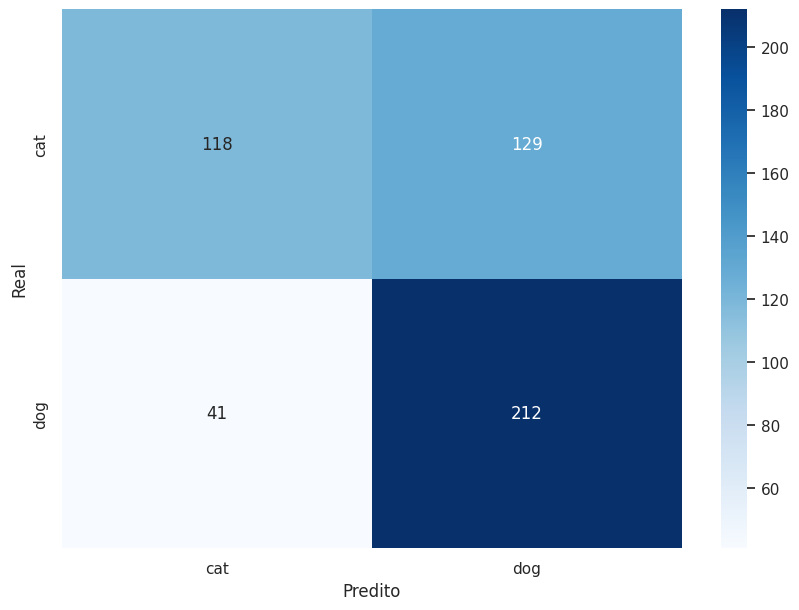

In [ ]:
# Predições e matriz de confusão
y_pred = model.predict(test).squeeze()
y_pred_classes = y_pred>0.5
y_true_classes = test_labels.squeeze()

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - {ModelosEscolhidos[model]}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

Relatório de Classificação:
              precision    recall  f1-score   support

         cat       0.85      0.50      0.63       247
         dog       0.65      0.92      0.76       253

    accuracy                           0.71       500
   macro avg       0.75      0.71      0.70       500
weighted avg       0.75      0.71      0.70       500



# <a class='anchor' id='5'></a>

> # **4. Model Explanation**

In [ ]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_27 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 256, 256, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 256, 256, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,629,989 (193.14 MB)

 Trainable params: 16,876,417 (64.38 MB)

 Non-trainable params: 736 (2.88 KB)

 Optimizer params: 33,752,836 (128.76 MB)

In [ ]:
linear_model = tf.keras.models.Model(inputs=[model.layers[0].input], outputs=[model.layers[-2].output])
train_preds = model.predict(train).squeeze()
labels

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step  


['cat', 'dog']

In [ ]:
train_list = list(train)
score = CategoricalScore([0])
saliency = Saliency(model, clone=False)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_328
Received: inputs=['Tensor(shape=(1, 256, 256, 3))']
  warnings.warn(msg)


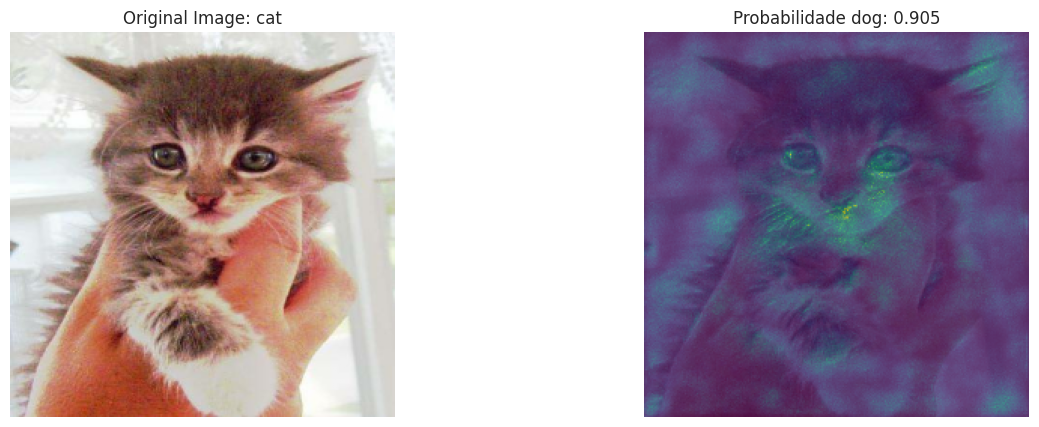

In [ ]:
# Load and preprocess an example image
img_id = 0 # 1161
img = train_list[0][0][img_id]  # Tensor
img_array = np.expand_dims(img, axis = 0)  # Normalize and add batch dimension, now numpy array
# Compute saliency map
saliency_map = saliency(score, img_array, smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)
# Overlay saliency map on original image
heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8(np.floor(saliency_map*255)).squeeze(), cv2.COLORMAP_VIRIDIS), cv2.COLOR_BGR2RGB)
overlay = cv2.addWeighted(heatmap, 0.7, np.uint8(img), 0.2, 0)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img/255)
ax[0].set_title(f"Original Image: {labels[int(train_list[0][1][img_id])]}")
ax[0].axis("off")

ax[1].imshow(overlay)
ax[1].set_title(f"Probabilidade {labels[1]}: {train_preds[img_id]:.3f}")
ax[1].axis("off")

plt.show()

Ver a imagem do indice global 1161 (batch 36 indice 9)

===========================================================
```python
def ver_imagem_por_indice(indice_global, dataset, batch_size=32):
    batch_num = indice_global // batch_size
    indice_no_batch = indice_global % batch_size
    
    for batch_idx, (batch_images, batch_labels) in enumerate(dataset):
        if batch_idx == batch_num:
            img = batch_images[indice_no_batch].numpy()
            label = batch_labels[indice_no_batch].numpy()
            
            return img, label

indice_procura = 1161

# Carregar a imagem do índice global 1161
img, label = ver_imagem_por_indice(indice_procura, train)
saliency_map = saliency(score, np.expand_dims(img, axis=0), smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)

heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8(np.floor(saliency_map*255)).squeeze(), cv2.COLORMAP_VIRIDIS), cv2.COLOR_BGR2RGB)
overlay = cv2.addWeighted(heatmap, 0.7, np.uint8(img), 0.2, 0)

# Exibir os resultados
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img / 255)
ax[0].set_title(f"Imagem Original: {labels[int(label)]}")
ax[0].axis("off")

ax[1].imshow(overlay)
ax[1].set_title(f"Probabilidade {labels[1]}: {train_preds[1161]:.3f}")
ax[1].axis("off")

plt.show()

In [ ]:
# https://tree.rocks/get-heatmap-from-cnn-convolution-neural-network-aka-grad-cam-222e08f57a34

In [ ]:
# Get all test images as list of np arrays
test_images = []
test_class = []
for batch_x, batch_y in test:
    for image, class_ in zip(batch_x, batch_y):
        test_images.append(np.array(image))
        test_class.append(class_)

In [ ]:
# Erradas
bad_preds = (y_pred_classes != y_true_classes).nonzero()[0]

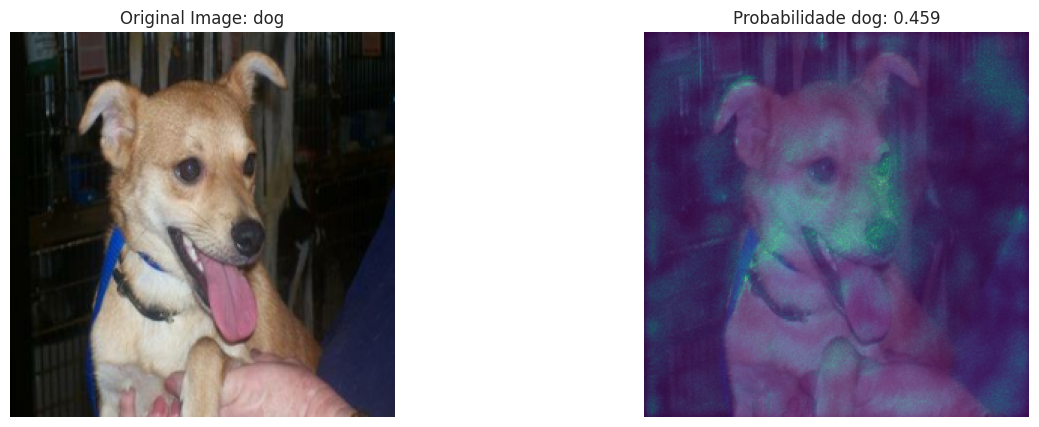

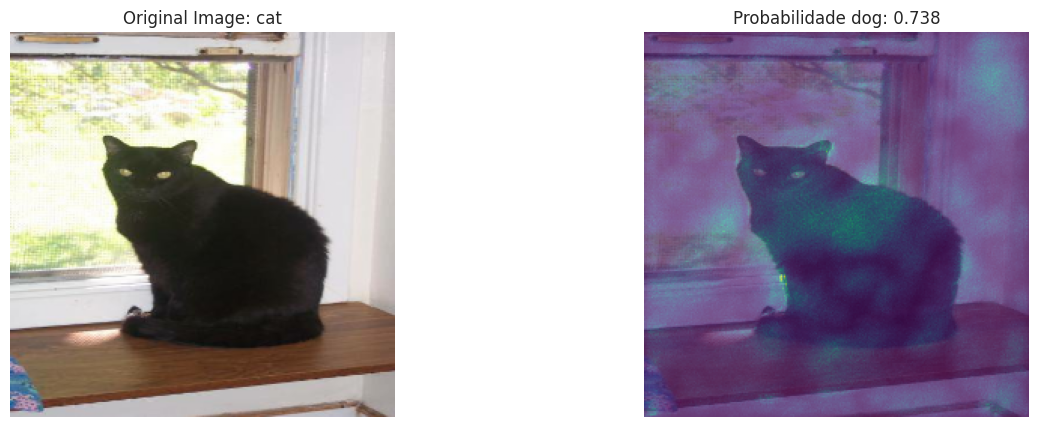

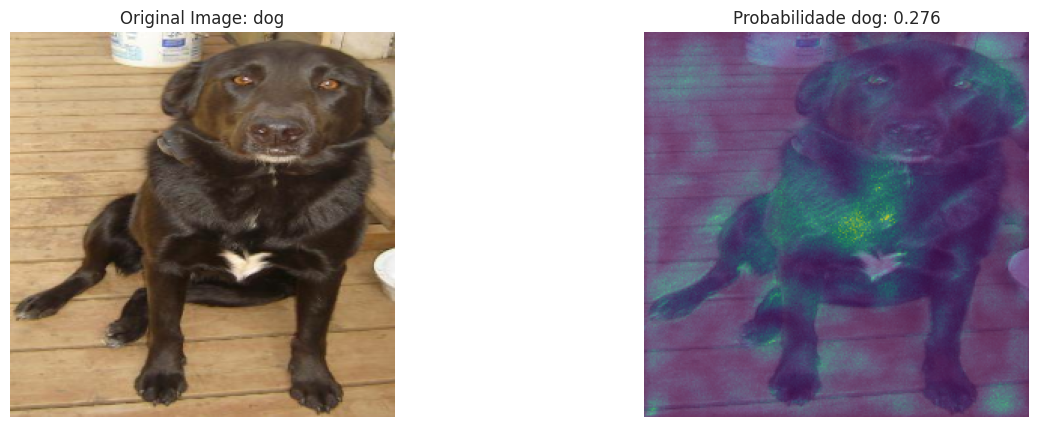

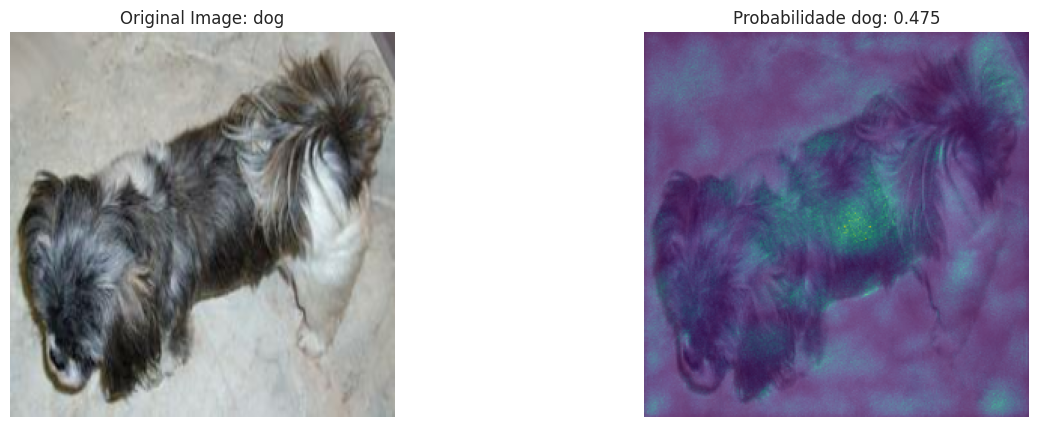

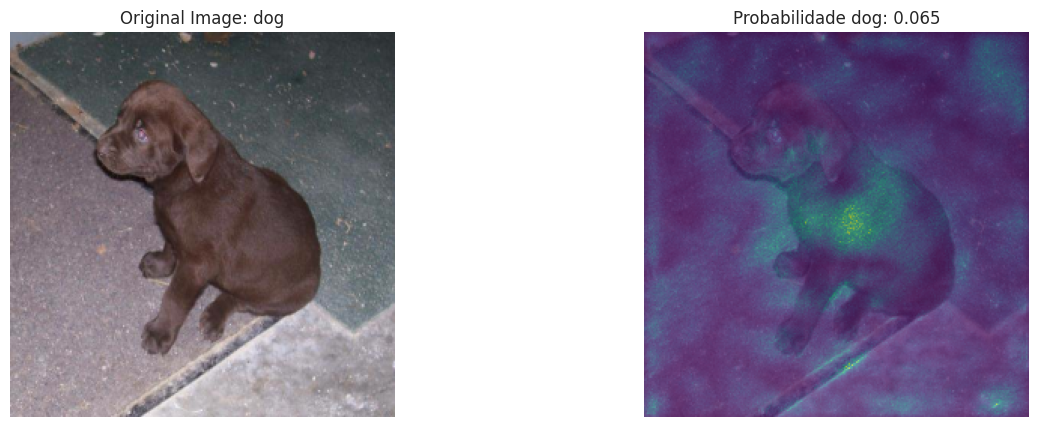

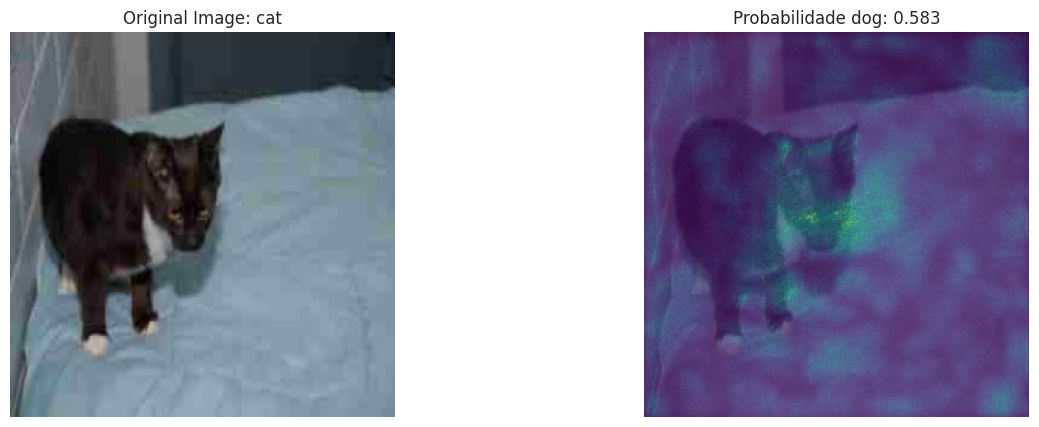

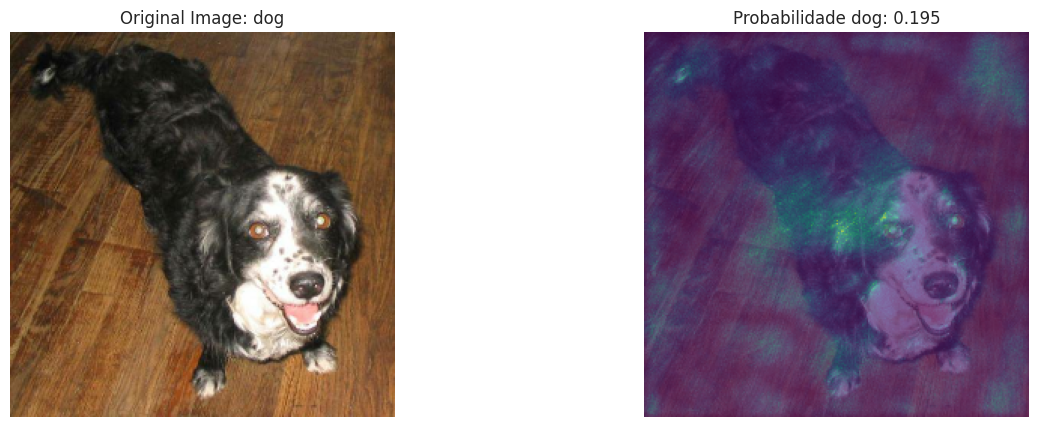

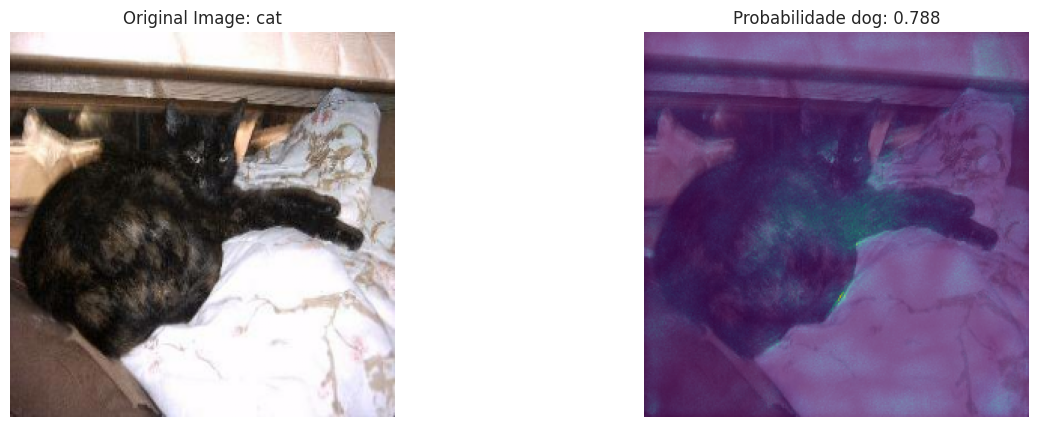

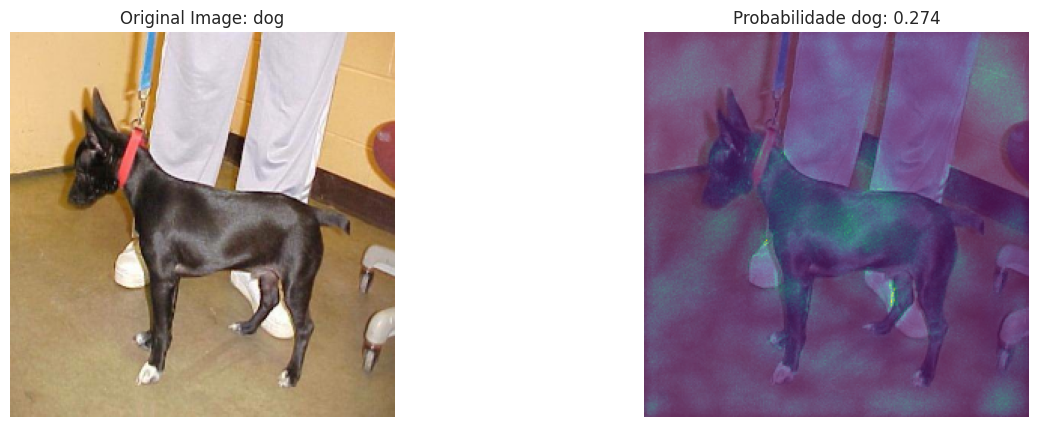

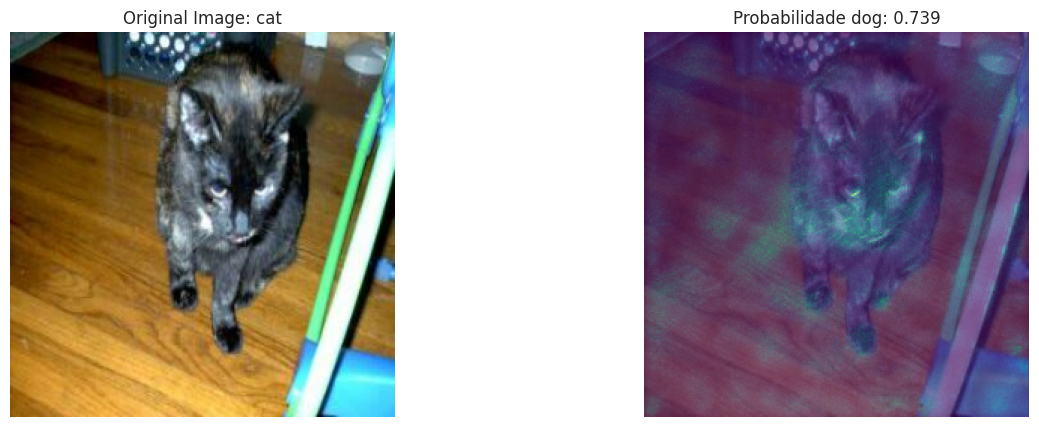

In [ ]:
for img_id in bad_preds[:10]:
    # Load and preprocess an example image
    img = test_images[img_id]  # array
    img_array = np.expand_dims(img, axis = 0)  # Normalize and add batch dimension, now numpy array
    # Compute saliency map
    saliency_map = saliency(score, img_array, smooth_samples=20, smooth_noise=0.2, normalize_map=True)
    # saliency_map = normalize(saliency_map)
    # Overlay saliency map on original image
    heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8(np.floor(saliency_map*255)).squeeze(), cv2.COLORMAP_VIRIDIS), cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(heatmap, 0.7, np.uint8(img), 0.3, 0)
    
    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(img/255)
    ax[0].set_title(f"Original Image: {labels[int(test_class[img_id])]}")
    ax[0].axis("off")
    
    ax[1].imshow(overlay)
    ax[1].set_title(f"Probabilidade {labels[1]}: {y_pred[img_id]:.3f}")
    ax[1].axis("off")
    
    plt.show()
